In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

In [2]:
# Import libraries
library(dplyr)
library(tidyr)
library(readr) 
library(caret)
library(ggplot2)
library(gplots)
library(GGally)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [3]:
# Importing dataset
df <- read.csv("/kaggle/input/heart-dataset/heart.csv")
head(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [4]:
# Getting the dimensions of the dataframe
dim(df)

[1] 1025   14

In [5]:
# Getting summary statistics for the dataframe
summary(df)

      age             sex               cp            trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.0000   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :1.0000   Median :130.0  
 Mean   :54.43   Mean   :0.6956   Mean   :0.9424   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.0000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.0000   Max.   :200.0  
      chol          fbs            restecg          thalach     
 Min.   :126   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:132.0  
 Median :240   Median :0.0000   Median :1.0000   Median :152.0  
 Mean   :246   Mean   :0.1493   Mean   :0.5298   Mean   :149.1  
 3rd Qu.:275   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak          slope             ca        
 Min.   :

In [6]:
# Getting information about the dataframe
str(df)

'data.frame':	1025 obs. of  14 variables:
 $ age     : int  52 53 70 61 62 58 58 55 46 54 ...
 $ sex     : int  1 1 1 1 0 0 1 1 1 1 ...
 $ cp      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ trestbps: int  125 140 145 148 138 100 114 160 120 122 ...
 $ chol    : int  212 203 174 203 294 248 318 289 249 286 ...
 $ fbs     : int  0 1 0 0 1 0 0 0 0 0 ...
 $ restecg : int  1 0 1 1 1 0 2 0 0 0 ...
 $ thalach : int  168 155 125 161 106 122 140 145 144 116 ...
 $ exang   : int  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  1 3.1 2.6 0 1.9 1 4.4 0.8 0.8 3.2 ...
 $ slope   : int  2 0 0 2 1 1 0 1 2 1 ...
 $ ca      : int  2 0 0 1 3 0 3 1 0 2 ...
 $ thal    : int  3 3 3 3 2 2 1 3 3 2 ...
 $ target  : int  0 0 0 0 0 1 0 0 0 0 ...


In [7]:
# Count missing values in each column
colSums(is.na(df))

age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal   target 
       0        0        0        0        0        0

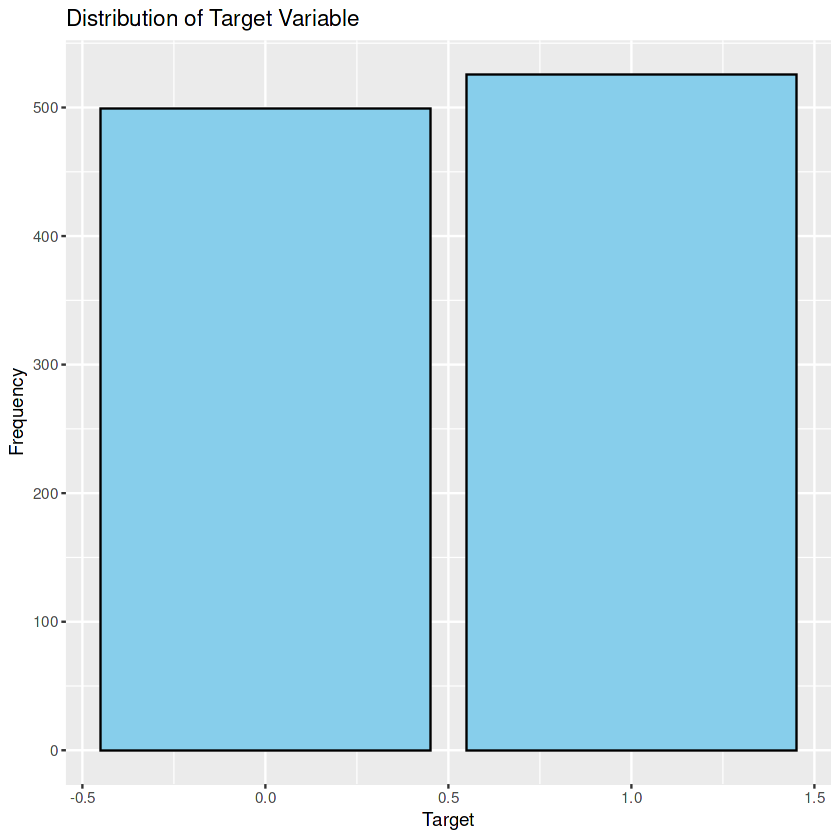

In [8]:
# Visualizing the distribution of the target variable
ggplot(df, aes(x = target)) +
geom_bar(fill = "skyblue", color = "black", stat = "count") +
labs(title = "Distribution of Target Variable", x = "Target", y = "Frequency")

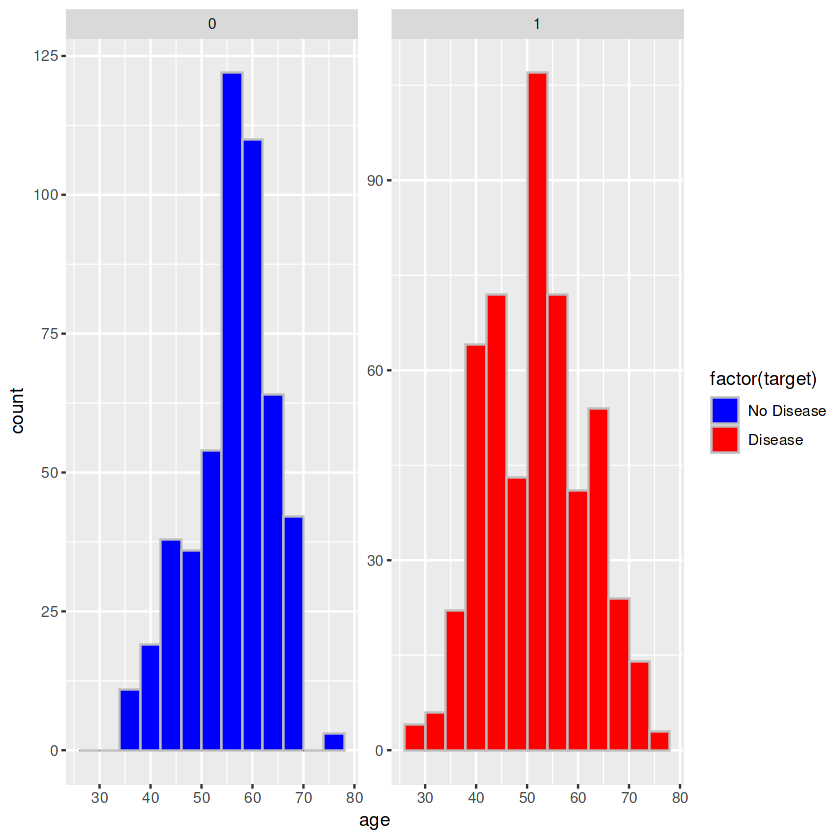

In [9]:
# Creating two separate plots for heart disease and no heart disease
ggplot(df, aes(x = age, fill = factor(target))) +
geom_histogram(binwidth = 4, position = "dodge", color = 'grey') +
scale_fill_manual(values = c("0" = "blue", "1" = "red"), 
                  labels = c("No Disease", "Disease")) +
facet_wrap(~target, scales = "free_y")

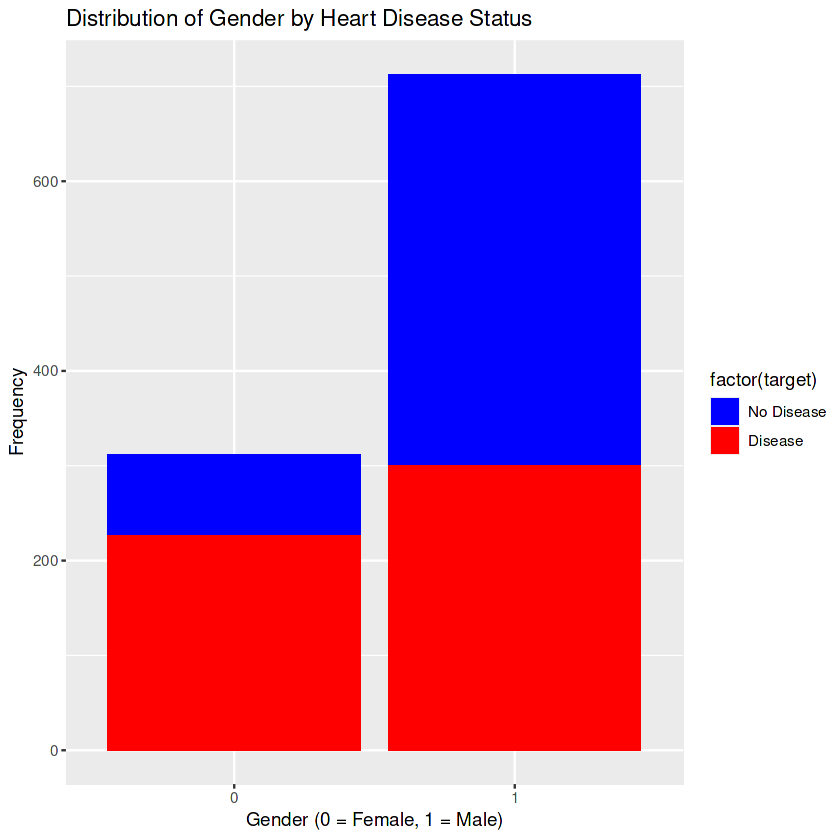

In [10]:
# Visualizing the relationship between gender and heart disease
ggplot(df, aes(x = factor(sex), fill = factor(target))) + geom_bar() +
labs(title = "Distribution of Gender by Heart Disease Status",
     x = "Gender (0 = Female, 1 = Male)", y = "Frequency") +
scale_fill_manual(values = c("0" = "blue", "1" = "red"), 
                  labels = c("No Disease", "Disease"))

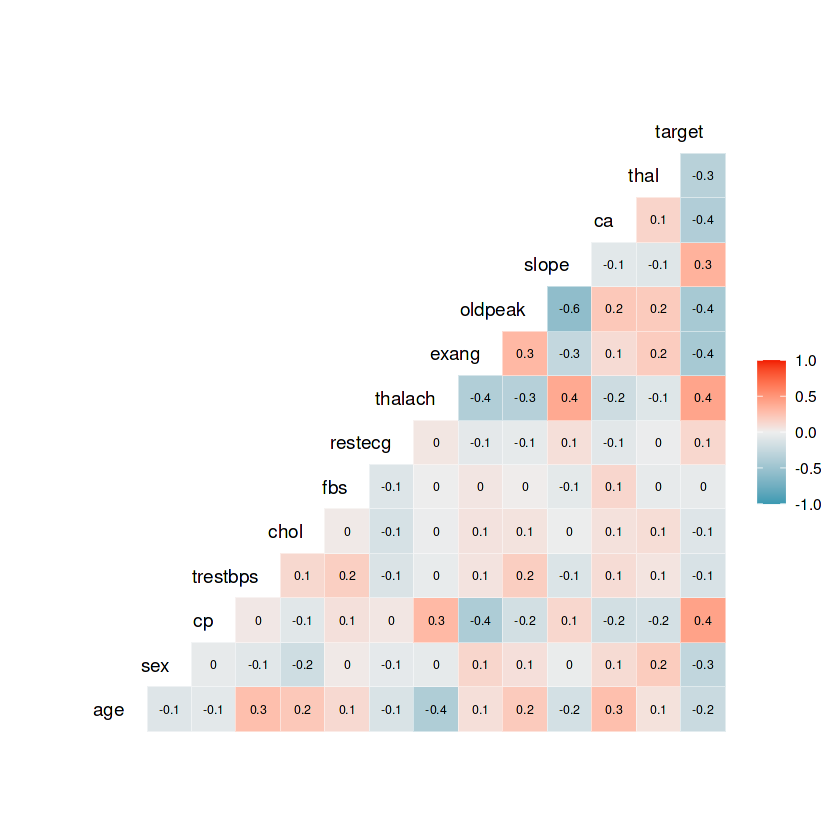

In [11]:
# Correlation matrix
ggcorr(df, label = TRUE, label_size = 2.5, hjust = 1, layout.exp = 2)

In [12]:
# Data Encoding
heart <- df %>%
  mutate(sex = as.factor(sex),
         cp = as.factor(cp),
         fbs = as.factor(fbs),
         restecg = as.factor(restecg),
         exang = as.factor(exang),
         slope = as.factor(slope),
         ca = as.factor(ca),
         thal = as.factor(thal),
         target = as.factor(target))

# Checking the structure of the dataset
str(heart)

'data.frame':	1025 obs. of  14 variables:
 $ age     : int  52 53 70 61 62 58 58 55 46 54 ...
 $ sex     : Factor w/ 2 levels "0","1": 2 2 2 2 1 1 2 2 2 2 ...
 $ cp      : Factor w/ 4 levels "0","1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ trestbps: int  125 140 145 148 138 100 114 160 120 122 ...
 $ chol    : int  212 203 174 203 294 248 318 289 249 286 ...
 $ fbs     : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 1 1 1 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 2 1 2 2 2 1 3 1 1 1 ...
 $ thalach : int  168 155 125 161 106 122 140 145 144 116 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak : num  1 3.1 2.6 0 1.9 1 4.4 0.8 0.8 3.2 ...
 $ slope   : Factor w/ 3 levels "0","1","2": 3 1 1 3 2 2 1 2 3 2 ...
 $ ca      : Factor w/ 5 levels "0","1","2","3",..: 3 1 1 2 4 1 4 2 1 3 ...
 $ thal    : Factor w/ 4 levels "0","1","2","3": 4 4 4 4 3 3 2 4 4 3 ...
 $ target  : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...


In [13]:
# Feature selection
features <- df[, c('age', 'sex',  'cp', 'trestbps', 'chol', 'restecg', 'thalach', 
                   'exang', 'oldpeak', 'slope', 'ca', 'thal')]
target <- df$target

# Data normalization
preprocessParams <- preProcess(features, method = c("center", "scale"))
features_normalized <- predict(preprocessParams, features)

# Splitting the data
split <- createDataPartition(target, p = 0.8, list = FALSE)
X_train <- features_normalized[split, ]
X_test <- features_normalized[-split, ]
Y_train <- target[split]
Y_test <- target[-split]

# Print the shape of the training and test sets
print(paste("X_train shape:", paste(dim(X_train), collapse = "x")))
print(paste("X_test shape:", paste(dim(X_test), collapse = "x")))

[1] "X_train shape: 820x12"
[1] "X_test shape: 205x12"


In [14]:
# Combine features and target into a single data frame
train_data <- as.data.frame(cbind(target = Y_train, X_train))

# Training the logistic regression model
model <- glm(target ~ ., data = train_data, family = "binomial")

In [15]:
# Making predictions on the test set
predictions <- predict(model, newdata = as.data.frame(X_test), type = "response")

# Converting probabilities to binary predictions based on threshold 0.5
binary_predictions <- ifelse(predictions >= 0.5, 1, 0)

# Combining actual values and predicted values into a data frame
result <- data.frame(actual = Y_test, predicted = binary_predictions)

# Evaluating the model
confusionMatrix(data = as.factor(binary_predictions), reference = as.factor(Y_test), 
                   positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 87 13
         1 14 91
                                          
               Accuracy : 0.8683          
                 95% CI : (0.8142, 0.9114)
    No Information Rate : 0.5073          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7365          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8750          
            Specificity : 0.8614          
         Pos Pred Value : 0.8667          
         Neg Pred Value : 0.8700          
             Prevalence : 0.5073          
         Detection Rate : 0.4439          
   Detection Prevalence : 0.5122          
      Balanced Accuracy : 0.8682          
                                          
       'Positive' Class : 1               
                                    

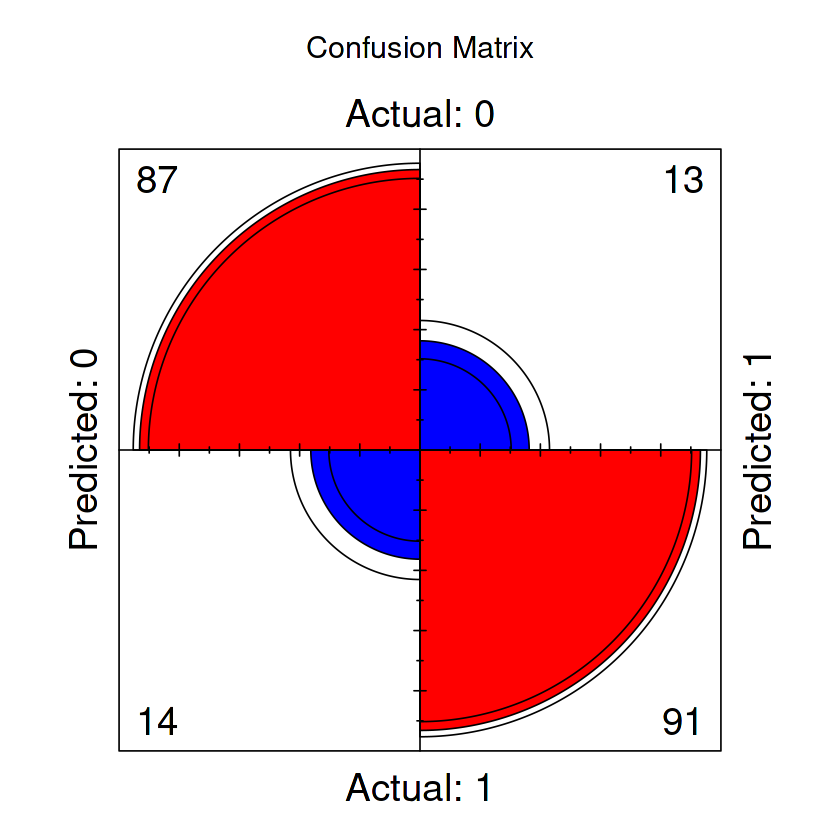

In [16]:
# Create a confusion matrix
conf_matrix <- table(factor(binary_predictions, levels = c("0", "1")), 
                     factor(Y_test, levels = c("0", "1")))

# Set the dimension names of the confusion matrix
dimnames(conf_matrix) <- list(Actual = c("0", "1"), Predicted = c("0", "1"))

# Plot the fourfold plot with color and main title
fourfoldplot(conf_matrix, color = c("blue", "red"), main = "Confusion Matrix")

In [17]:
# Assuming you have a test dataset named 'test_data' with the same features the training
# Combine features and target into a single data frame for the test set
test_data <- as.data.frame(cbind(target = Y_test, X_test))

# Making predictions on the test set
predictions <- predict(model, newdata = as.data.frame(test_data[, -1]),type ="response")

# Converting probabilities to binary predictions based on threshold 0.5
binary_predictions <- ifelse(predictions >= 0.5, 1, 0)

# Combining actual values and predicted values into a data frame
result <- data.frame(actual = test_data$target, predicted = binary_predictions)

# Displaying the results
print(result)

     actual predicted
1         0         0
4         0         0
7         0         0
8         0         0
10        0         0
17        1         1
22        1         1
31        0         0
33        0         0
34        0         0
38        1         1
41        1         1
42        1         1
45        1         1
49        1         1
50        0         0
52        0         0
60        0         1
61        1         1
62        1         1
84        1         1
85        1         1
92        1         1
107       0         0
108       0         0
125       0         0
128       1         1
129       1         0
130       1         1
131       1         1
138       1         1
145       1         1
158       1         1
162       1         1
163       0         0
167       0         0
172       0         0
173       1         1
176       0         0
181       0         0
183       0         0
184       1         1
189       0         0
207       0         1
221       

In [20]:
## Conclusion 
#As a prevalent disease today, predicting heart disease in patients is crucial for timely intervention and recovery. Logistic regression offers a valuable method to predict heart disease by analyzing patterns in patient data. This information can assist healthcare professionals in identifying high-risk patients and implementing preventive measures.